# Basic python lesson 03: pandas

Written by Simon M. Mudd with last update 21/01/2022

It is possible that someone who knows something about python will look at these lessons. They will skim lesson 01 and 02 and then get to this lesson and think "what are you doing, you can't go from something as basic as assigning and making a numpy array straight to pandas, you psychopath!". They will then run away, screaming like a banshee, and jump into a canal. 

But I don't care what those people think. Because I want you to know how to plot some spreadsheet data as quickly as possible. 

Ready? Lets go!!

## What does a Chinese bear have to do with importing data?

`pandas` comes from "python data analysis library". It sounds better than "pdal". Although I like bicylces so I might have called it "pedal". Anyway, I did not write pandas. [A guy working for a hedge fund did](https://pandas.pydata.org/about/index.html), because analysis of financial data often involves dealing with messy time series data. This package has ended up being immensely useful to all kinds of people and now forms one of the keystones of data science in python. 

`pandas` is most at home reading `csv` data. `csv` stands for "comma separated value". You can save excel files in this format. The format has columns separated by commas. Like this:

```
year,pond,toads
2011,1,1
2011,2,13
2012,1,2
2012,2,11
2013,1,7
2013,2,4
```


Actually, let me write this file. You won't really be writing files like this in python so don't worry about the syntax.  

In [1]:
f = open("toadfile.csv", "w")
f.write("year,pond,toads")
f.write("\n2011,1,1")
f.write("\n2011,2,13")
f.write("\n2012,1,2")
f.write("\n2012,2,11")
f.write("\n2013,1,7")
f.write("\n2013,2,4")
f.close()

with open("toadfile.csv", 'r') as fin:
    print(fin.read())

year,pond,toads
2011,1,1
2011,2,13
2012,1,2
2012,2,11
2013,1,7
2013,2,4


Okay, if you wanted to you could open this file using Excel. But instead we will open it with `pandas` 

## Pandas and toads

We first need to import `pandas`. And because I don't feel like writing out `pandas` all the time I will import it as `pd`. 

I will then read the toads file using the `read_csv` function:

In [2]:
import pandas as pd
df = pd.read_csv("toadfile.csv")

Hey what happened? There is no output if you run the above cell. 

That is because `pandas` has read the data in the toadfile into a variable called `df`. In the `pandas` world `df` is quite common name for a variable because it is short for `dataframe`. And `pandas` calls any collection of data a `DataFrame`. You can see this with the `type` command.  

In [3]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


Okay, what if we want to look at the data? You can use the `head` command to see the data

In [4]:
df.head()

,year,pond,toads
0,2011,1,1
1,2011,2,13
2,2012,1,2
3,2012,2,11
4,2013,1,7


The default is to see the first 5 items. You can change this quite easily:

In [5]:
df.head(6)

,year,pond,toads
0,2011,1,1
1,2011,2,13
2,2012,1,2
3,2012,2,11
4,2013,1,7
5,2013,2,4


## Selecting data using `pandas` (where a lot of the magic happens)

Why is `pandas` so useful? Well one of the things I find most useful is the ease of selecting data. 

Observe me get the `toads` data:

In [6]:
toads = df.toads
print("The data type of the variable toads is: ")
print(type(toads))
print("And here is the data:")
print(toads)
print("I can convert this to a list")
print(list(toads))
print("And I can convert it to an array:")
print(toads.to_numpy())

The data type of the variable toads is: 
<class 'pandas.core.series.Series'>
And here is the data:
0     1
1    13
2     2
3    11
4     7
5     4
Name: toads, dtype: int64
I can convert this to a list
[1, 13, 2, 11, 7, 4]
And I can convert it to an array:
[ 1 13  2 11  7  4]


Here is another very useful feature. You can select data by conditional statements (if the data meets a condition, you keep it).

You need this funny syntax with some brackets but as long as you copy the format below with your own data you should be fine. 

In [7]:
df_2011 = df[(df['year'] == 2011)]
df_2011.head()

,year,pond,toads
0,2011,1,1
1,2011,2,13


In [8]:
df_2011 = df[(df['year'] > 2011)]
df_2011.head()

,year,pond,toads
2,2012,1,2
3,2012,2,11
4,2013,1,7
5,2013,2,4


In [9]:
df_pond1 = df[(df['pond'] == 1)]
df_pond1.head()

,year,pond,toads
0,2011,1,1
2,2012,1,2
4,2013,1,7


## Plotting some data using `pandas`

Recent versions of `pandas` have some built in plotting functions. You can [see the options here](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html).

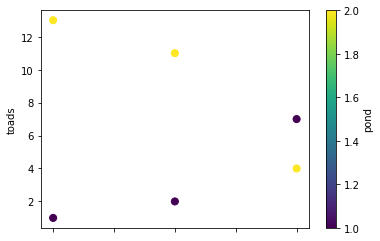

In [10]:
df.plot.scatter(x="year", y="toads", c="pond", cmap="viridis", s=50);

## A more complicated dataset

We can now have a look at a more complicated dataset. This has some data about river channels. 

First load the data into a `pandas` dataframe.

In [11]:
df = pd.read_csv("el_study_chi_data_map.csv")
df.head()

,latitude,longitude,chi,elevation,flow_distance,drainage_area,source_key,basin_key
0,55.877436,-2.549256,9.1343,389.98,4230.0,46852.0,0,0
1,55.877454,-2.549224,9.1119,389.98,4227.2,46864.0,0,0
2,55.877472,-2.549224,9.0961,389.95,4225.2,46912.0,0,0
3,55.877490,-2.549224,9.0803,389.95,4223.2,48104.0,0,0
4,55.877508,-2.549192,9.0581,389.91,4220.3,48160.0,0,0


This data has latitude and longitude, which tells you it is geospatial data. We will deal with that in different lessons. But we can also look at some other aspects of the data. 

In the next bit of code I will get the unique values in the "basin_key" column:

In [13]:
df.basin_key.unique()

array([0, 1, 2, 3, 4])

So it happens that I made these data so I know that each "basin_key" is a different drainage basin. We can look at one of these basins.

<AxesSubplot:xlabel='flow_distance', ylabel='elevation'>

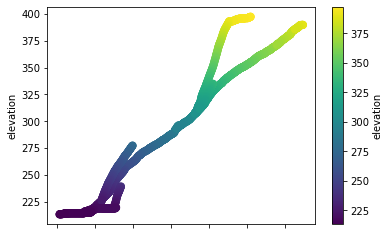

In [34]:
df_basin0 = df[(df.basin_key==0)]
df_basin0.plot.scatter(x="flow_distance", y="elevation", c="elevation", cmap="viridis", s=50)

Here is another basin:

<AxesSubplot:xlabel='flow_distance', ylabel='elevation'>

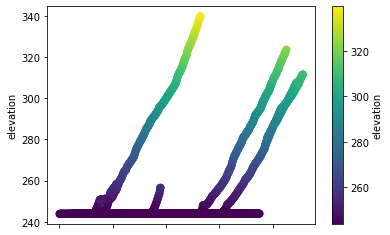

In [36]:
df_basin3 = df[(df.basin_key==2)]
df_basin2.plot.scatter(x="flow_distance", y="elevation", c="elevation", cmap="viridis", s=50)